## IRIS-10 Python tutorial

In this tutorial you will learn to load and work with IRIS data in Python using [IRISPy](https://docs.sunpy.org/projects/irispy/en/latest/) and other standard packages. IRISPy is still under heavy development, so some of the options used here may change in later versions. There is another tutorial in ITN 41, [A low-level guide to IRIS with Python](http://iris.lmsal.com/itn41/index.html), where similar tasks are done using only lower-level libraries. This tutorial can be seen as a high-level version of ITN 41, one that is easier to use.

This tutorial is given as a jupyter notebook. You will need to run the code in the cells in a sequential manner to make it work. Press shift+enter on a cell to run it. Some parts of the tutorial have questions (green squares) and blank cells to enter your answers. We will solve this during the session, but for reference there is also a notebook called `IRIS10_answers.ipynb` in the same directory. If after the session you want to run this tutorial in your laptop, please have a look at the **instructions page** to find out how to install all the required packages.

In the first code cell we have a bunch of imports and configuration settings.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.visualization import quantity_support
from IPython.display import set_matplotlib_formats

from irispy.sji import read_iris_sji_level2_fits as read_sji
from irispy.spectrograph import read_iris_spectrograph_level2_fits as read_sp

# Set up some default matplotlib options
quantity_support()
set_matplotlib_formats('svg')
plt.rc('image', origin='lower')
plt.rc('xtick', direction='out')
plt.rc('figure', figsize=(4, 5)) # Larger figure sizes
plt.rc('font', size=12)

# Silence warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Working with IRIS spectrograph files

Now let us start by reading a spectrograph file. We are going to use the option `memmap=True` to avoid loading the whole file into memory. We also use `uncertainty=False` to avoid calculating the uncertainties, which takes even more time and memory. Note that when `memmap=True`, the data values are read from the FITS file directly without the scaling to `Float32`,  the data values are no longer in DN, but in scaled integer units that start at −2$^{16}$/2.

### bit.ly/iris10python

In [2]:
sp = read_sp('iris_l2_20180102_153155_3610108077_raster_t000_r00000.fits',
             uncertainty=False, memmap=True)

In [3]:
sp

<iris.IRISSpectrograph instance
OBS ID: 3610108077
OBS Description: Very large dense 320-step raster 105.3x175 320s   Deep x 8 Spatial x
OBS Period: 2018-01-02 15:31:55.700 -- 16:21:01.960
Instance period: 2018-01-02 15:31:55.870 -- 16:20:52.810
OBS Number unique raster positions: 320
Spectral windows: dimensions [repeats axis, raster axis, slit axis, spectral axis]:
      C II 1336 : [1, 320, 548, 335]   pix
       O I 1356 : [1, 320, 548, 414]   pix
     Si IV 1394 : [1, 320, 548, 195]   pix
     Si IV 1403 : [1, 320, 548, 338]   pix
           2832 : [1, 320, 548, 60]    pix
           2814 : [1, 320, 548, 76]    pix
   Mg II k 2796 : [1, 320, 548, 380]   pix>

In [5]:
sp.spectral_windows

spectral window,detector type,brightest wavelength,min wavelength,max wavelength
str12,str4,float64,float64,float64
C II 1336,FUV1,1335.70996094,1331.76765015,1340.43829023
O I 1356,FUV1,1355.59997559,1346.74657028,1357.46805038
Si IV 1394,FUV2,1393.7800293,1391.20246787,1396.13782787
Si IV 1403,FUV2,1402.77001953,1398.12214787,1406.69542787
2832,NUV,2832.84199545,2831.33985549,2834.3441354
2814,NUV,2814.56171601,2812.65221607,2816.47121595
Mg II k 2796,NUV,2796.19995117,2790.65477674,2809.95345615


In [6]:
mg = sp.data['Mg II k 2796'][0]

In [7]:
mg

IRISSpectrogramCube
---------------------
OBS ID: 3610108077
OBS Description: Very large dense 320-step raster 105.3x175 320s   Deep x 8 Spatial x
OBS period: 2018-01-02T15:31:55.700 -- 2018-01-02T16:21:01.960

Spectrogram period: (<Time object: scale='utc' format='isot' value=2018-01-02T15:31:55.870>,) -- 2018-01-02T16:20:52.810
Data shape: [320. 548. 380.] pix
Axis Types: ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat', 'em.wl')

In this case our sequence is only one 320-step raster, so we chose `mg` to be the zeroth index. As seen above, is a 3D cube with 2 dimensions of space and one of wavelength. We can make plots of cuts along this cube:

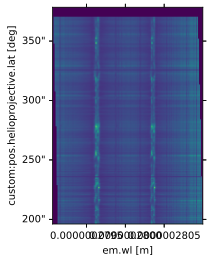

In [8]:
mg[0].plot()

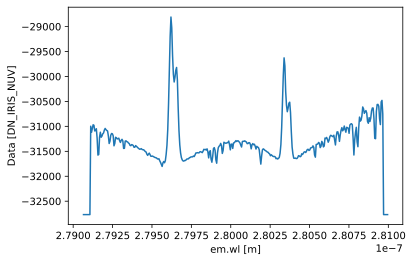

In [11]:
mg[120, 200].plot()

The default plots take the units and labels from the FITS WCS information, and often do not come in the most useful units (e.g. wavelengths in metres). Note the negative scale for the data because we are using `memmap=True` (otherwise, these would be data numbers). We can read the wavelengths of the Mg window by calling `axis_world_coords` for `wl` (wavelength), and redo the plot with a better scale:

In [16]:
mg_wave = mg.axis_world_coords('wl')
mg_wave.to('m')

<Quantity [2.79065478e-07, 2.79070570e-07, 2.79075662e-07, 2.79080754e-07,
           2.79085846e-07, 2.79090938e-07, 2.79096030e-07, 2.79101122e-07,
           2.79106214e-07, 2.79111306e-07, 2.79116398e-07, 2.79121490e-07,
           2.79126582e-07, 2.79131674e-07, 2.79136766e-07, 2.79141858e-07,
           2.79146950e-07, 2.79152042e-07, 2.79157134e-07, 2.79162226e-07,
           2.79167318e-07, 2.79172410e-07, 2.79177502e-07, 2.79182594e-07,
           2.79187686e-07, 2.79192778e-07, 2.79197870e-07, 2.79202962e-07,
           2.79208054e-07, 2.79213146e-07, 2.79218238e-07, 2.79223330e-07,
           2.79228422e-07, 2.79233514e-07, 2.79238606e-07, 2.79243698e-07,
           2.79248790e-07, 2.79253882e-07, 2.79258974e-07, 2.79264066e-07,
           2.79269158e-07, 2.79274250e-07, 2.79279342e-07, 2.79284434e-07,
           2.79289526e-07, 2.79294618e-07, 2.79299710e-07, 2.79304802e-07,
           2.79309894e-07, 2.79314986e-07, 2.79320078e-07, 2.79325170e-07,
           2.79330262e-07

(-32000, -30200)

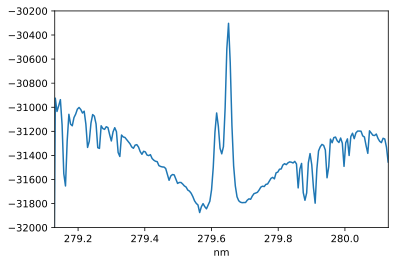

In [17]:
fig, ax = plt.subplots()
plt.plot(mg_wave.to('nm'), mg[10, 10].data)
ax.set_xlim(279.13 * u.nm, 280.13 * u.nm)
ax.set_ylim(-32000, -30200)

We can also improve on the default spectrogram plot by adjusting some options:

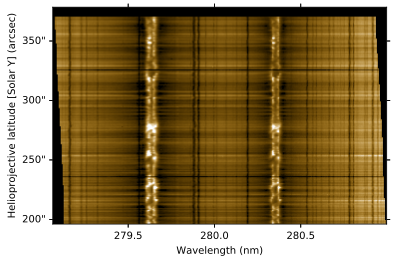

In [18]:
mg[0].plot(vmin=-31800, vmax=-29500, aspect='auto', cmap='irissjiNUV')
ax = plt.gca()
ax.coords[0].set_major_formatter('x.x') 
ax.coords[0].set_format_unit(u.nm)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Helioprojective latitude [Solar Y] (arcsec)')

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
What is the wavelength position that corresponds to Mg II k core (279.63 nm)?
</div>

In [21]:
# your answer here
tmp = mg.world_to_pixel(0 * u.arcsec, 0 * u.arcsec, 279.63 * u.nm)
mg_index = int(np.round(tmp[-1].value))
mg_index

111

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
Plot spectroheliogram for Mg II k core wavelength.

</div>

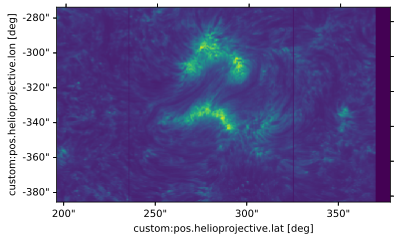

In [22]:
mg[:, :, mg_index].plot()

Using the default `.plot()` method will show a cut with the position of the axes in the same order as they are saved in the FITS file. This means that latitude (solar Y) will be in the x axis and longitude (solar X) in the y axis. To properly plot them, we need to manually redo the plot with a transposed version of the data, which involves a few more lines of code:

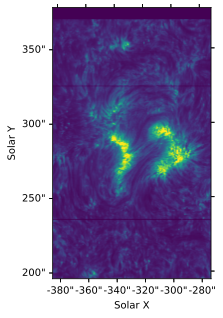

In [26]:
fig = plt.figure(figsize=(4, 5))
ax = plt.subplot(projection=mg.wcs.dropaxis(0), slices=('y', 'x'))
ax.imshow(mg.data[:, :, mg_index].T, vmin=-31800, vmax=-22500)
ax.set_xlabel("Solar X")
ax.set_ylabel("Solar Y")

Imagine there's a really cool feature at (-338", 275"), how can you plot the spectrum at that location? You can use `world_to_pixel` to convert from solar coordinates to array indices and make the plot:

In [27]:
tmp = mg.world_to_pixel(-338 * u.arcsec, 275 * u.arcsec, 279.63 * u.nm)
coords = [int(np.round(a.value)) for a in tmp[:2]]
coords

[133, 238]

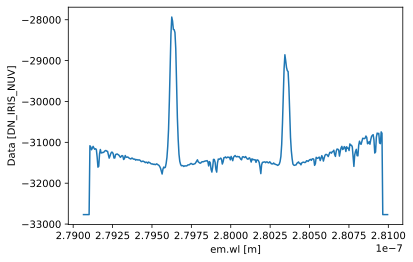

In [28]:
mg[coords[0], coords[1]].plot()

Now, you may also be interested in knowing the time that was this observation taken. There is some information in `.meta`:

In [29]:
mg.meta

{'SAT_ROT': <Quantity 0.00023047 deg>,
 'DATE_OBS': <Time object: scale='utc' format='isot' value=2018-01-02T15:31:55.870>,
 'DATE_END': <Time object: scale='utc' format='isot' value=2018-01-02T16:20:52.740>,
 'HLZ': False,
 'SAA': False,
 'DSUN_OBS': <Quantity 1.47094e+11 m>,
 'IAECEVFL': 'NO',
 'IAECFLAG': 'NO',
 'IAECFLFL': 'NO',
 'KEYWDDOC': 'http://www.lmsal.com/iris_science/irisfitskeywords.pdf',
 'detector type': 'NUV',
 'spectral window': 'Mg II k 2796',
 'OBSID': '3610108077',
 'OBS_DESC': 'Very large dense 320-step raster 105.3x175 320s   Deep x 8 Spatial x',
 'STARTOBS': <Time object: scale='utc' format='isot' value=2018-01-02T15:31:55.700>,
 'ENDOBS': <Time object: scale='utc' format='isot' value=2018-01-02T16:21:01.960>}

But this is mostly about the observation in general. Times of individual scans are saved in `.extra_coords['time']['value']`. This will give an array with the same length as the number of scans:

In [30]:
mg.extra_coords['time']['value'][coords[0]]

<Time object: scale='utc' format='isot' value=2018-01-02T15:52:20.430>

In [31]:
mg.extra_coords['time']['value'][coords[0]].isot

'2018-01-02T15:52:20.430'

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
Exercise: plot a spectroheliogram for the Si IV 139.38 nm line. Use `vmin=-31950` and `vmax=-31700`.
    
</div>

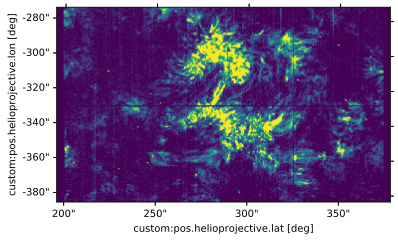

In [34]:
# Your answer here
si = sp.data['Si IV 1394'][0]
si_wave = si.axis_world_coords('wl')
si_index = int(np.abs(si_wave - 139.38 * u.nm).argmin())
si[:, :, si_index].plot(vmin=-31950, vmax=-31700)

### 2. Working with IRIS Slit-Jaw Image files

To work with IRIS SJI files, we use the function we renamed `read_sji`. Note that in this case the file is small, so we don't need to use `memmap=True`. Note also that we can read the `.gz` compressed file directly:

In [35]:
sji = read_sji("iris_l2_20180102_153155_3610108077_SJI_1400_t000.fits.gz")

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [36]:
sji.meta

{'TELESCOP': 'IRIS',
 'INSTRUME': 'SJI',
 'TWAVE1': 1400.0,
 'STARTOBS': <Time object: scale='utc' format='isot' value=2018-01-02T15:31:55.700>,
 'ENDOBS': <Time object: scale='utc' format='isot' value=2018-01-02T16:21:01.960>,
 'NBFRAMES': 80,
 'OBSID': '3610108077',
 'OBS_DESC': 'Very large dense 320-step raster 105.3x175 320s   Deep x 8 Spatial x',
 'FOVX': 281.132,
 'FOVY': 182.32,
 'XCEN': -329.321,
 'YCEN': 286.652}

Can't remember what is OBSID 3610108077? IRISpy has an utility function that will print out some more information:

In [37]:
from irispy.obsid import ObsId

In [38]:
ObsId(sji.meta['OBSID'])

IRIS OBS ID 3610108077
----------------------
Description:       Very large dense 320-step raster 105.3x175 320s
SJI filters:                  C II   Si IV   Mg II h/k   Mg II w
SJI field of view:                                       175x175
Exposure time:                                               8.0 s
Binning:                               Spatial x 2, Spectral x 2
FUV binning:                              FUV binned same as NUV
SJI cadence:                                 SJI cadence default
Compression:                                Lossless compression
Linelist:                                         Large linelist

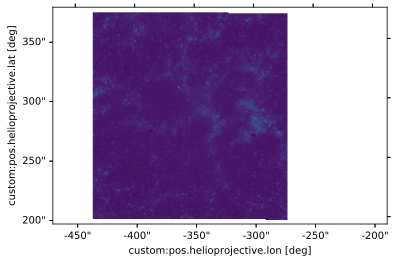

In [41]:
sji[20].plot()

Just as in the spectrograph case, we can pass some simple options to the plot function. Note that from SunPy we also get the IRIS colour maps!

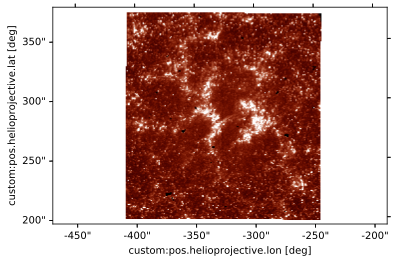

In [42]:
sji[40].plot(vmin=0, vmax=80, cmap='irissji1400')

Because the FITS files have the WCS coordinate information, we can use this to work in solar coordinates instead of pixels in the array. For example, let us cut the central part, from -375" to -275" in solar X and 250" to 325" in solar Y. We need to specify the bottom and top corners for the cut (note the coordinate order needs to match the FITS WCS header, and is inverse from the plotted image, so y comes first, x second).

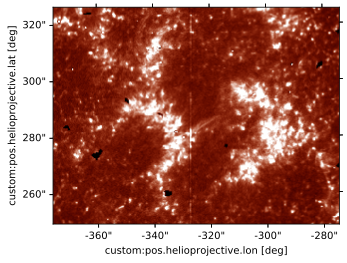

In [43]:
sji_cut = sji[40].crop_by_coords(lower_corner=(250 * u.arcsec, -375 * u.arcsec), 
                                 upper_corner=(325 * u.arcsec, -275 * u.arcsec))
sji_cut.plot(vmin=0, vmax=80, cmap='irissji1400')

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

Print the time of the current observation (`sji_cut` object).
    
</div>

In [45]:
# Your answer here
sji_cut.extra_coords['TIME']['value'].isot

'2018-01-02T15:56:56.420'

Now let's load another SJI file.

In [46]:
del sji
sji = read_sji("iris_l2_20140919_051712_3860608353_SJI_2832_t000.fits")

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


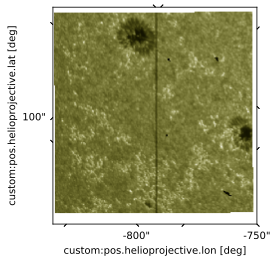

In [47]:
sji[0].plot(cmap='irissji2832')

This dataset has a peculiarity: the observation has a 45 degree roll. The image does not have a 45 degree rotation because `.plot()` shows the data in the way they are written in the file, for efficiency. However, if you note closely, you'll see that the tickmarks for the coordinate values are rotated, and the numbers reflect this. We can also overplot a grid to better see this. This way we plot it from scratch, and have more control over the elements:

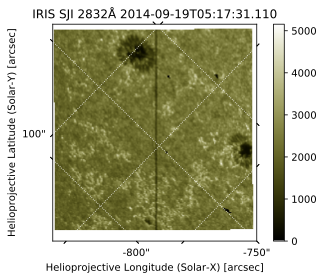

In [48]:
ax = plt.subplot(projection=sji.wcs.dropaxis(-1))
img = ax.imshow(sji[0].data, cmap='irissji2832', vmin=0)
ax.grid(color='w', ls=':')
ax.set_xlabel("Helioprojective Longitude (Solar-X) [arcsec]")
ax.set_ylabel("Helioprojective Latitude (Solar-Y) [arcsec]")
ax.set_title("IRIS SJI %.0fÅ %s" % (sji.meta['TWAVE1'],
                                    sji.extra_coords['TIME']['value'][0]))
plt.colorbar(img, ax=ax)

Lets us now find the SJI observation where the time is closest to 06:00 on 2014-09-19. There are several ways of doing this. One is to use the time arrays in `extra_coords['TIME']['value']`:

In [49]:
time_sji = np.array(sji.extra_coords['TIME']['value'], dtype='datetime64')
time_target = np.array(['2014-09-19T06:00:00.0'], dtype='datetime64')
time_index = np.abs(time_sji - time_target).argmin()
time_sji[time_index]

TypeError: Scalar 'Time' object has no len()

### 3. Aligning IRIS SJI with AIA

Let us know assume we want to alight this IRIS observation with an AIA image. The fact that it is rolled 45 degrees makes it even more interesting, difficult to do manually, and will illustrate the power of working with WCS. In the current directory there is an AIA 170 nm image that was taken close to 06:00 on this same day. We will need to use SunPy to load this image. Let's also import a few more functions and modules:

In [50]:
import sunpy.map
from sunpy.instr.aia import aiaprep

from matplotlib.patches import Polygon
from astropy.coordinates import SkyCoord

And now let us plot a subset of the AIA image, close to the IRIS observation:

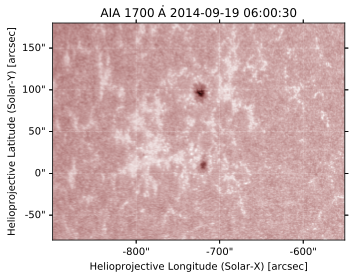

In [51]:
aia_file = 'aia_20140919_060030_1700_image_lev1.fits'
tmp = sunpy.map.Map(aia_file)
aia = aiaprep(tmp)  # to bring it up to level 1.5

# create a submap around the sunspots
top_right = SkyCoord(-550*u.arcsec, 180*u.arcsec, frame=aia.coordinate_frame)
bottom_left = SkyCoord(-900 * u.arcsec, -80. * u.arcsec, frame=aia.coordinate_frame)
aia_sub = aia.submap(top_right, bottom_left)
aia_sub.plot()

Now let's plot the IRIS field of view on the AIA image using the information from the WCS coordinates. We will use the `pixel_to_world` to convert from pixels to WCS coordinates, and then plot a polygon using the coordinates of the 4 corners of the IRIS image:

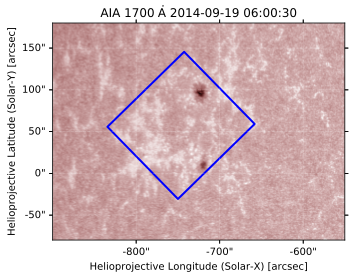

In [52]:
aia_sub.plot()
ax = plt.gca()
dims = sji.data.shape
_, ypts, xpts = sji.pixel_to_world(np.zeros(4) * u.pix, 
                                   [0, dims[1] - 1, dims[1] -1 , 0] * u.pix,
                                   [0, 0, dims[2] - 1, dims[2] - 1] * u.pix)
iris_points = np.array([xpts.value, ypts.value, ]).T
r = Polygon(iris_points, closed=True, edgecolor='b', facecolor='none', lw=2,
            transform=ax.get_transform('world'))
ax.add_patch(r)

So now we have the blue square showing the region of the IRIS observations. If we compare with the IRIS image above, this seems right: we capture both sunspots, and one of them is close to the edge. To work with both IRIS and AIA data, it helps if the image axes are aligned, and for this we need to rotate one of them. We can either rotate AIA to the IRIS frame, or vice-versa. Generally, it is easier to rotate AIA to IRIS because IRIS images are higher resolution and the files contain a sequence of images. Let's do that, again using the WCS coordinates of both objects. First, we rotate the AIA map using the inverse rotation of the IRIS frame:

In [53]:
aia_rot = aia.rotate(rmatrix=np.matrix(sji.wcs.wcs.pc[:-1, :-1]).I)

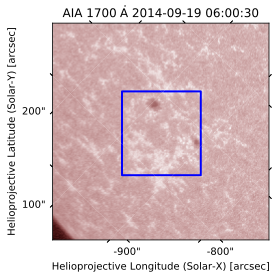

In [54]:
# Create submap on rotated image, with slightly smaller lower field of view
top_right = SkyCoord(-610*u.arcsec, 160*u.arcsec, frame=aia_rot.coordinate_frame)
bottom_left = SkyCoord(-880 * u.arcsec, -40. * u.arcsec, frame=aia_rot.coordinate_frame)
aia_rot_sub = aia_rot.submap(top_right, bottom_left)
aia_rot_sub.plot()
# add the same IRIS field-of-view:
ax = plt.gca()
r = Polygon(iris_points, closed=True, edgecolor='b', facecolor='none', lw=2,
            transform=ax.get_transform('world'))
ax.add_patch(r) 
plt.show()

If we want to show an AIA and IRIS image side by side, we can now crop the rotated AIA image to exactly the same size as the IRIS image:

In [55]:
top_right = SkyCoord(xpts[0], ypts[0], frame=aia_rot.coordinate_frame)
bottom_left = SkyCoord(xpts[-2], ypts[-2], frame=aia_rot.coordinate_frame)
aia_rot_sub = aia_rot.submap(top_right, bottom_left)

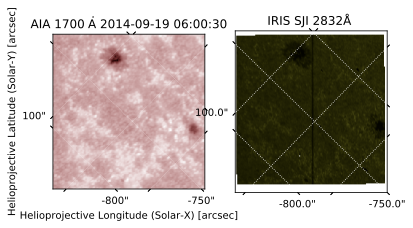

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1, projection=aia_rot_sub)
aia_rot_sub.plot()

ax2 = fig.add_subplot(1,2,2, projection=sji.wcs.dropaxis(-1))
ax2.imshow(sji[40].data, cmap='irissji2832', vmin=0)
ax2.coords[0].set_major_formatter('s.s')
ax2.coords[1].set_major_formatter('s.s')
ax2.set_title("IRIS SJI %.0fÅ " % (sji.meta['TWAVE1']))
ax2.grid(color='w', ls=':')